In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append(Path('../GaussianAvatars').resolve().as_posix())

import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)
np.random.seed(0)

### Rendering setup

In [4]:
from aegis.splat import load_gaussians, PipelineConfig, render_single_frame, reset_flame_params
from aegis.utils import plot_single_frame
from utils.viewer_utils import OrbitCamera

In [6]:
pipeline = PipelineConfig(
    background_color=[1., 1., 1.]
)

In [7]:
W: int = 960
H: int = 540
radius: float = 1
fovy: float = 20

root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')

In [8]:
# Selected region can be one of:
# 'left_eye', 'right_eye', 'lips', 'nose', 'ears', 'neck', 'forehead', 'face', 'left_half', 'right_half' 

gaussians, eyes_mask = load_gaussians(Path("../datasets/NeRSembleReconst/avatars/306/point_cloud.ply"), select_regions=['left_eye', 'right_eye', 'lips', 'nose'])

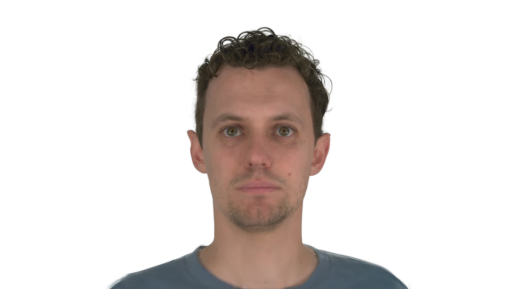

In [10]:
rgb = render_single_frame(gaussians, root_cam, pipeline)
plot_single_frame(rgb)

In [11]:
gaussians.select_mesh_by_timestep(0)

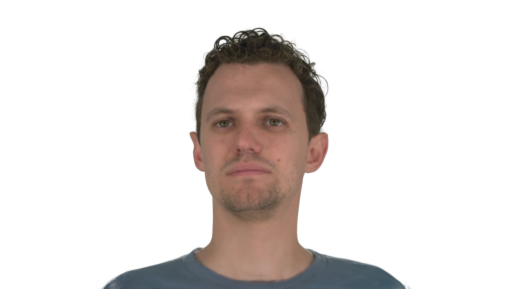

In [12]:
rgb2 = render_single_frame(gaussians, root_cam, pipeline)
plot_single_frame(rgb2)

In [13]:
reset_flame_params(gaussians)
root_cam.orbit_y(0.5)

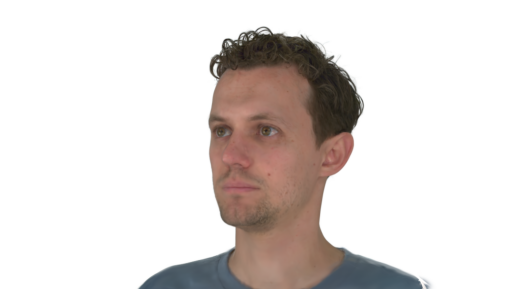

In [14]:
rgb3 = render_single_frame(gaussians, root_cam, pipeline)
plot_single_frame(rgb3)

In [15]:
root_cam.orbit_y(-0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030810013..1.0809999].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.030810013..1.0809999].


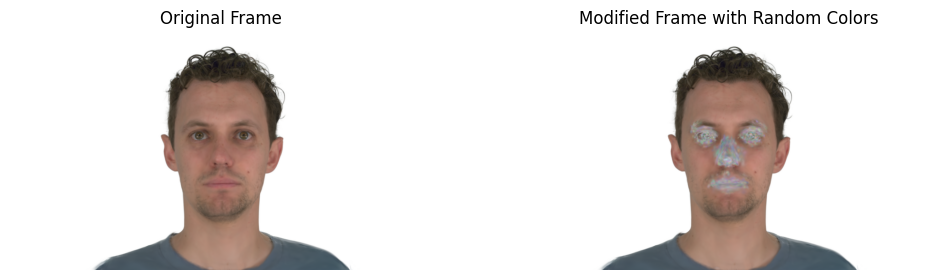

In [ ]:
from copy import deepcopy

initial_colors = gaussians._features_dc.clone().unsqueeze(0)
initial_render = render_single_frame(gaussians, root_cam, pipeline)
rand_colors = torch.rand_like(initial_colors, device='cuda').squeeze(0)
# frame_mod, _ = render_splat_frame(dataset, pipeline, iteration, colors=rand_colors, frame_index=most_frontal_idx)
gaussians_copy = deepcopy(gaussians)

new_features = gaussians_copy._features_dc.clone()
new_features[eyes_mask] = rand_colors[eyes_mask]
gaussians_copy._features_dc = new_features

frame_mod = render_single_frame(gaussians_copy, root_cam, pipeline)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(initial_render.detach().cpu().numpy() / 255)
plt.title('Original Frame')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(frame_mod.detach().cpu().numpy())
plt.title('Modified Frame with Random Colors')
plt.axis('off')
plt.show()